In [8]:
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import numpy as np
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp

from matplotlib.patches import ConnectionPatch

In [9]:
plot_params = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    'font.serif': ['Times'],
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(plot_params)

In [10]:
prior_dist = tfp.distributions.Normal(2, 0.5)
theta_true = np.array([3.0])
x = tfp.distributions.Normal(theta_true, 1).sample().numpy()

In [11]:
theta = np.linspace(0, 4, num=1000)
likelihood = tfp.distributions.Normal(theta, 1).prob(x).numpy()
prior = prior_dist.prob(theta).numpy()
unnormalized_posterior = likelihood * prior
marginal_likelihood_integrated = np.trapz(unnormalized_posterior, theta)
posterior = unnormalized_posterior / marginal_likelihood_integrated
marginal_likelihood_est = prior * likelihood / posterior

In [7]:
cmap = plt.get_cmap("viridis", 5)


f, ax = plt.subplots(1, 1, figsize=set_size())

ax.vlines(x=x, ymin=0, ymax=1.0, label=r"data $y$", color="red")
ax.plot(theta, likelihood, label=r"likelihood $p(y\,|\,\theta)$", color=cmap(0))
ax.plot(theta, prior, label=r"prior $p(\theta)$", color=cmap(1))
ax.plot(theta, posterior, label=r"posterior $p(\theta\,|\,y)$", color=cmap(2))
ax.plot(theta, unnormalized_posterior, label=r"unnormalized posterior", color=cmap(3))
ax.plot(theta, marginal_likelihood_est, label=r"marginal likelihood $p(y)$", color=cmap(4))


ax.set_ylim(0, None)
ax.set_xlim(np.min(theta), np.max(theta))
ax.get_yaxis().set_visible(False)
ax.set_xlabel(r"$\theta$")

ax.legend(ncol=3, loc="upper center", bbox_to_anchor=(0.5, 1.25))
sns.despine()

NameError: name 'set_size' is not defined

In [ ]:
marginal_likelihood_integrated

0.2832327824272118

# 2D visualization

In [16]:
def plot_sc_row(theta1, theta2, y, prior, likelihood, posterior, marginal_likelihood, approximate=False):
    vmin, vmax = None, None
    cmap = plt.get_cmap("viridis", 20)

    # Create subplots for visualization with 1 row and 4 columns
    f, axes = plt.subplots(1, 4, figsize=(8, 2), gridspec_kw={'wspace': 0.4})

    #if approximate:
    #    f.suptitle(r"Imperfect posterior")
    #else:
    #    f.suptitle(r"Perfect posterior")
    
    plt.setp(axes, xticks=[], yticks=[])
    # Set equal aspect ratio for all plots
    for ax in axes:
        ax.set_aspect("equal")
        ax.set_xlim(np.min(theta1), np.max(theta1))
        ax.set_ylim(np.min(theta2), np.max(theta2))
        # ax.get_yaxis().set_visible(False)
        # ax.get_xaxis().set_visible(False)
        # ax.set_xlabel(r"$\theta_1$")
        # ax.set_ylabel(r"$\theta_2$")

    # Visualize the prior
    c = axes[0].contourf(theta1, theta2, prior, cmap=cmap, alpha=1, levels=20, vmin=vmin, vmax=vmax)
    # axes[0].set_title(r'Prior $p(\theta)$')
    axes[0].set_title(r'Prior')
    for cont in c.collections:
        cont.set_rasterized(True)

    # Visualize the likelihood
    c = axes[1].contourf(theta1, theta2, likelihood, cmap=cmap, alpha=1, levels=20, vmin=vmin, vmax=vmax)
    # axes[1].set_title(r'Likelihood $p(y|\theta)$')
    axes[1].set_title(r'Likelihood')
    for cont in c.collections:
        cont.set_rasterized(True)

    # Visualize the posterior
    c = axes[2].contourf(theta1, theta2, posterior, cmap=cmap, alpha=1, levels=20, vmin=vmin, vmax=vmax)
    for cont in c.collections:
        cont.set_rasterized(True)
    if approximate:
        # axes[2].set_title(r'Posterior $q_{\phi}(\theta|y)$')
        axes[2].set_title(r'Approximate posterior')
    else:
        # axes[2].set_title(r'Posterior $p(\theta|y)$')
        axes[2].set_title(r'True posterior')

    # Plot the constant marginal likelihood (no data point)
    c = axes[3].contourf(theta1, theta2, np.ones_like(theta1)*marginal_likelihood, cmap=cmap, alpha=1, levels=20)
    for cont in c.collections:
        cont.set_rasterized(True)
    if approximate:
        # axes[3].set_title(r'$p(\theta)\,p(y\,|\,\theta)/q_{\phi}(\theta\,|\,y)$')
        axes[3].set_title(r'Est.\,marginal likelihood')
    else:
        # axes[3].set_title(r'$p(\theta)\,p(y\,|\,\theta)/p(\theta\,|\,y)$')
        axes[3].set_title(r'Est.\,marginal likelihood')

 
    theta_tilde = np.array([
        [-1.0, 1.0],
        [-1.5, 1.2],
        [-1.5, 0.0],
        #[-0.5, 1.5],
        [-0.8, 0.5]
    ])
    
    axes[0].text(3.70, 0, r'$\times$', fontsize=24, verticalalignment='center')
    axes[1].text(3.75, 0, r'$/$', fontsize=24, verticalalignment='center')
    axes[2].text(3.75, 0, r'$=$', fontsize=24, verticalalignment='center')
    
    theta_tilde_color = "red"
    ml_annotation_color = "white"
    axes[2].scatter(theta_tilde[:, 0], theta_tilde[:, 1], color=theta_tilde_color, s=5)
    axes[3].scatter(theta_tilde[:, 0], theta_tilde[:, 1], color=theta_tilde_color, s=5)
    
    axes[2].text(-2.0, -2.2, r"$\theta\sim \pi(\theta)$", color=theta_tilde_color,
                bbox=dict(facecolor='white', edgecolor="white", pad=2.0), fontsize=12)

    for i in range(theta_tilde.shape[0]):
        # rad = -(theta_tilde[i][0]+1) / 6.0 + (theta_tilde[i][1]-1) / 3.0
        rad = np.sign(theta_tilde[i][1] - 1) * 0.3
        con = ConnectionPatch(xyA=theta_tilde[i], xyB=theta_tilde[i], coordsA="data", coordsB="data",
                              connectionstyle=f"arc3,rad={rad}", axesA=axes[3], axesB=axes[2], color=theta_tilde_color,
                             linestyle="dotted")
        axes[3].add_artist(con)
    
    
    axes[3].add_patch(plt.Circle((-1.2, 0.5), 1.0, color=ml_annotation_color, linewidth=1.5, fill=False))
    if approximate:
        axes[3].annotate(r"$\hat{p}(y)\neq$ const", (-2.5, -1.5), color=ml_annotation_color, fontsize=12)
        axes[3].annotate(r"$\mathrm{Var}_{\theta}\hat{p}(y) > 0$", (-2.5, -2.5), color=ml_annotation_color, fontsize=12)
    else:
        axes[3].annotate(r"$\hat{p}(y)$ = const", (-2.5, -1.5), color=ml_annotation_color, fontsize=12)
        axes[3].annotate(r"$\mathrm{Var}_{\theta}\hat{p}(y) = 0$", (-2.5, -2.5), color=ml_annotation_color, fontsize=12)
        
    plt.close()
    return f


def plot_sc_overview(y, prior_dist, likelihood_dist, approximate_posterior_dist=None):
    theta1 = np.linspace(-3, 3, num=100, dtype=np.float32)
    theta2 = np.linspace(-3, 3, num=100, dtype=np.float32)
    theta1, theta2 = np.meshgrid(theta1, theta2)
    theta_grid = np.stack((theta1, theta2), axis=-1).astype(np.float32)
    
    prior = prior_dist.prob(theta_grid).numpy()
    likelihood_cov = np.array([[1, 0.6], [0.6, 1]], dtype=np.float32)
    likelihood = likelihood_dist(theta_grid, covariance_matrix=likelihood_cov).prob(y).numpy()
    
    true_unnormalized_posterior = likelihood * prior
    delta_theta1 = theta1[0, 1] - theta1[0, 0]
    delta_theta2 = theta2[1, 0] - theta2[0, 0]
    true_marginal_likelihood = np.sum(true_unnormalized_posterior) * delta_theta1 * delta_theta2
    true_posterior = true_unnormalized_posterior / true_marginal_likelihood
    true_marginal_likelihood_est = (prior * likelihood) / true_posterior
    
    f_true = plot_sc_row(theta1, theta2, y, prior, likelihood, true_posterior, true_marginal_likelihood, approximate=False)
    
    if approximate_posterior_dist:
        approximate_posterior = approximate_posterior_dist.prob(theta_grid).numpy()
        approximate_marginal_likelihood_est = (prior * likelihood) / approximate_posterior
        f_approximate = plot_sc_row(theta1, theta2, y, prior, likelihood, approximate_posterior, approximate_marginal_likelihood_est, approximate=True)

    return f_true, f_approximate
        

In [17]:
y = np.array([-1, 1], dtype=np.float64)
prior_dist = tfp.distributions.MultivariateNormalFullCovariance(loc=[0,0], covariance_matrix=np.eye(2))
likelihood_dist = tfp.distributions.MultivariateNormalFullCovariance

                                                           
posterior_component_1 = tfp.distributions.MultivariateNormalFullCovariance(loc=[-1,1], covariance_matrix=np.array([[0.9, -0.8],[-0.8, 0.9]]).astype(np.float32))
posterior_component_2 = tfp.distributions.MultivariateNormalFullCovariance(loc=[-1,1], covariance_matrix=np.array([[0.9, 0.2],[0.2, 0.5]]).astype(np.float32))
posterior_component_3 = tfp.distributions.MultivariateNormalFullCovariance(loc=[-1,0], covariance_matrix=np.array([[1, 0.6],[0.6, 1]]).astype(np.float32))

approximate_posterior_dist = tfp.distributions.Mixture(
    cat=tfp.distributions.Categorical(probs=[0.35, 0.25, 0.5]), 
    components=[posterior_component_1, posterior_component_2, posterior_component_3],
)

f_true, f_approximate = plot_sc_overview(y, prior_dist, likelihood_dist, approximate_posterior_dist)

f_true.savefig("plots/figure_1_true.pdf", bbox_inches="tight")
f_approximate.savefig("plots/figure_1_approximate.pdf", bbox_inches="tight")

/var/folders/8n/pc0r4zbs3pn15xp3s0d7hk6h0000gn/T/ipykernel_92948/1401672722.py:28: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for cont in c.collections:
/var/folders/8n/pc0r4zbs3pn15xp3s0d7hk6h0000gn/T/ipykernel_92948/1401672722.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for cont in c.collections:
/var/folders/8n/pc0r4zbs3pn15xp3s0d7hk6h0000gn/T/ipykernel_92948/1401672722.py:40: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for cont in c.collections:
/var/folders/8n/pc0r4zbs3pn15xp3s0d7hk6h0000gn/T/ipykernel_92948/1401672722.py:51: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for cont in c.collections:


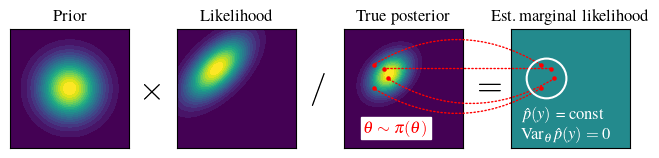

In [18]:
f_true

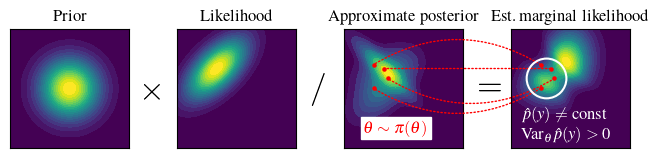

In [19]:
f_approximate